In [10]:
%reload_ext autoreload
%autoreload 2

# Text Analysis using TF-idf

Reference: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In information retrieval, tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a measure of importance of a word to a document in a collection or corpus, adjusted for the fact that some words appear more frequently in general. It was often used as a weighting factor in searches of information retrieval, text mining, and user modeling. A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries used tf–idf.

Variations of the tf–idf weighting scheme were often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

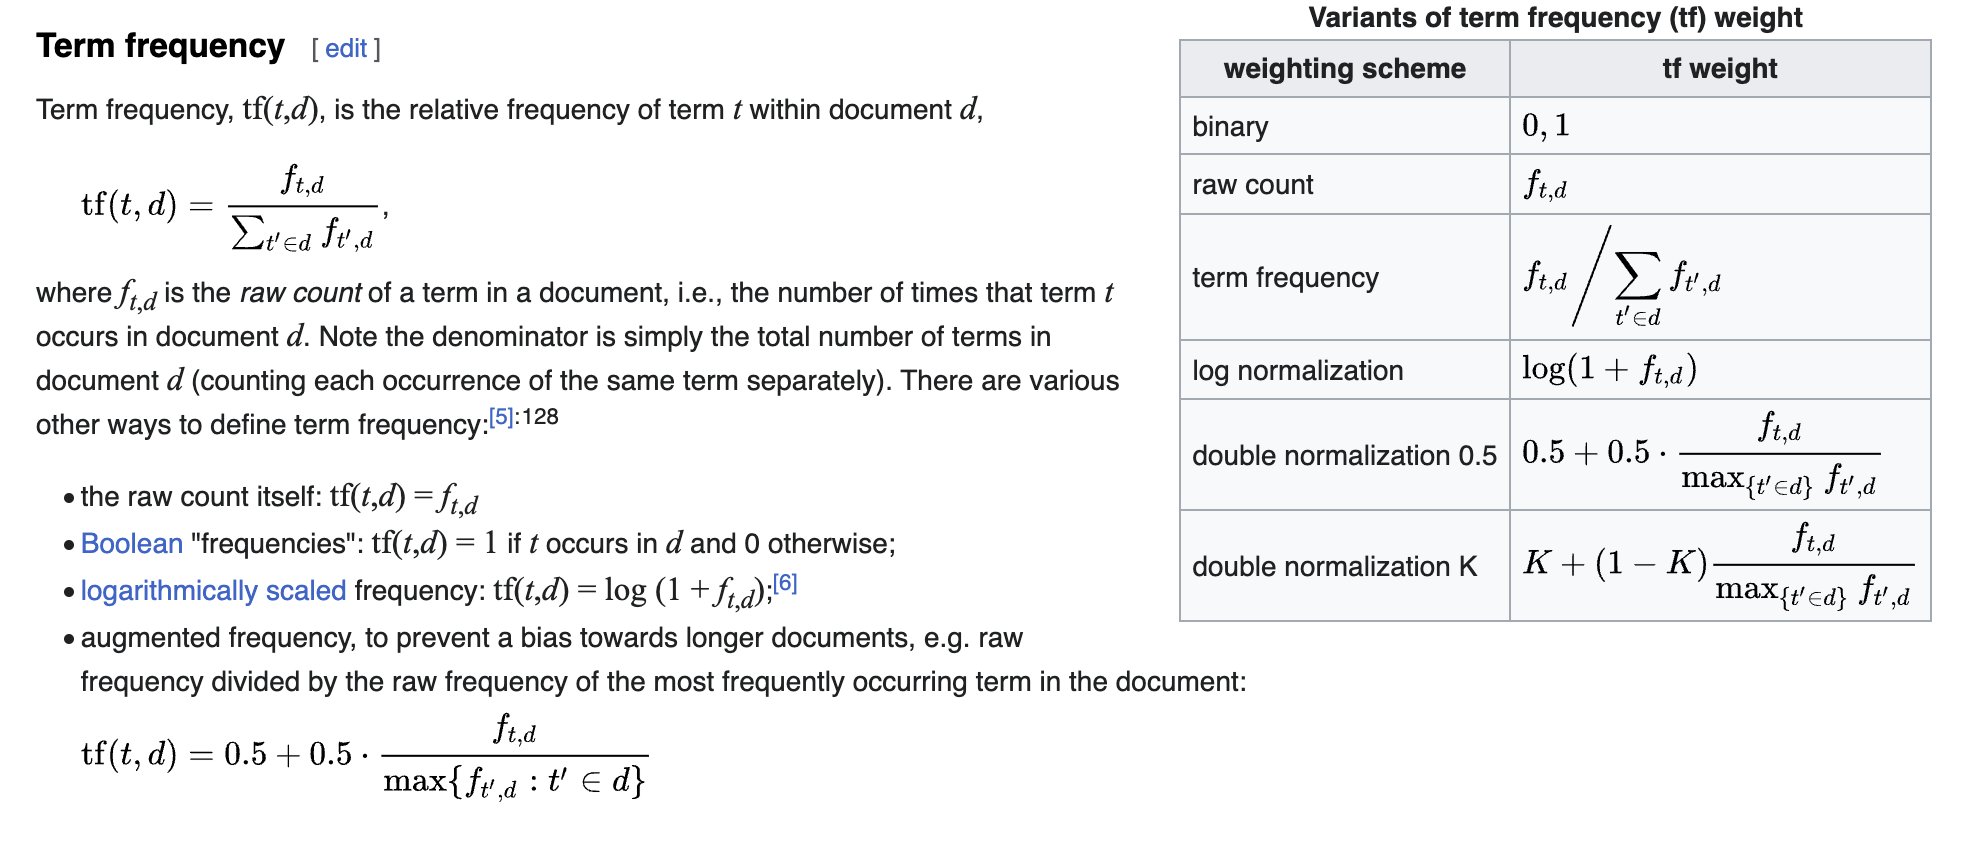

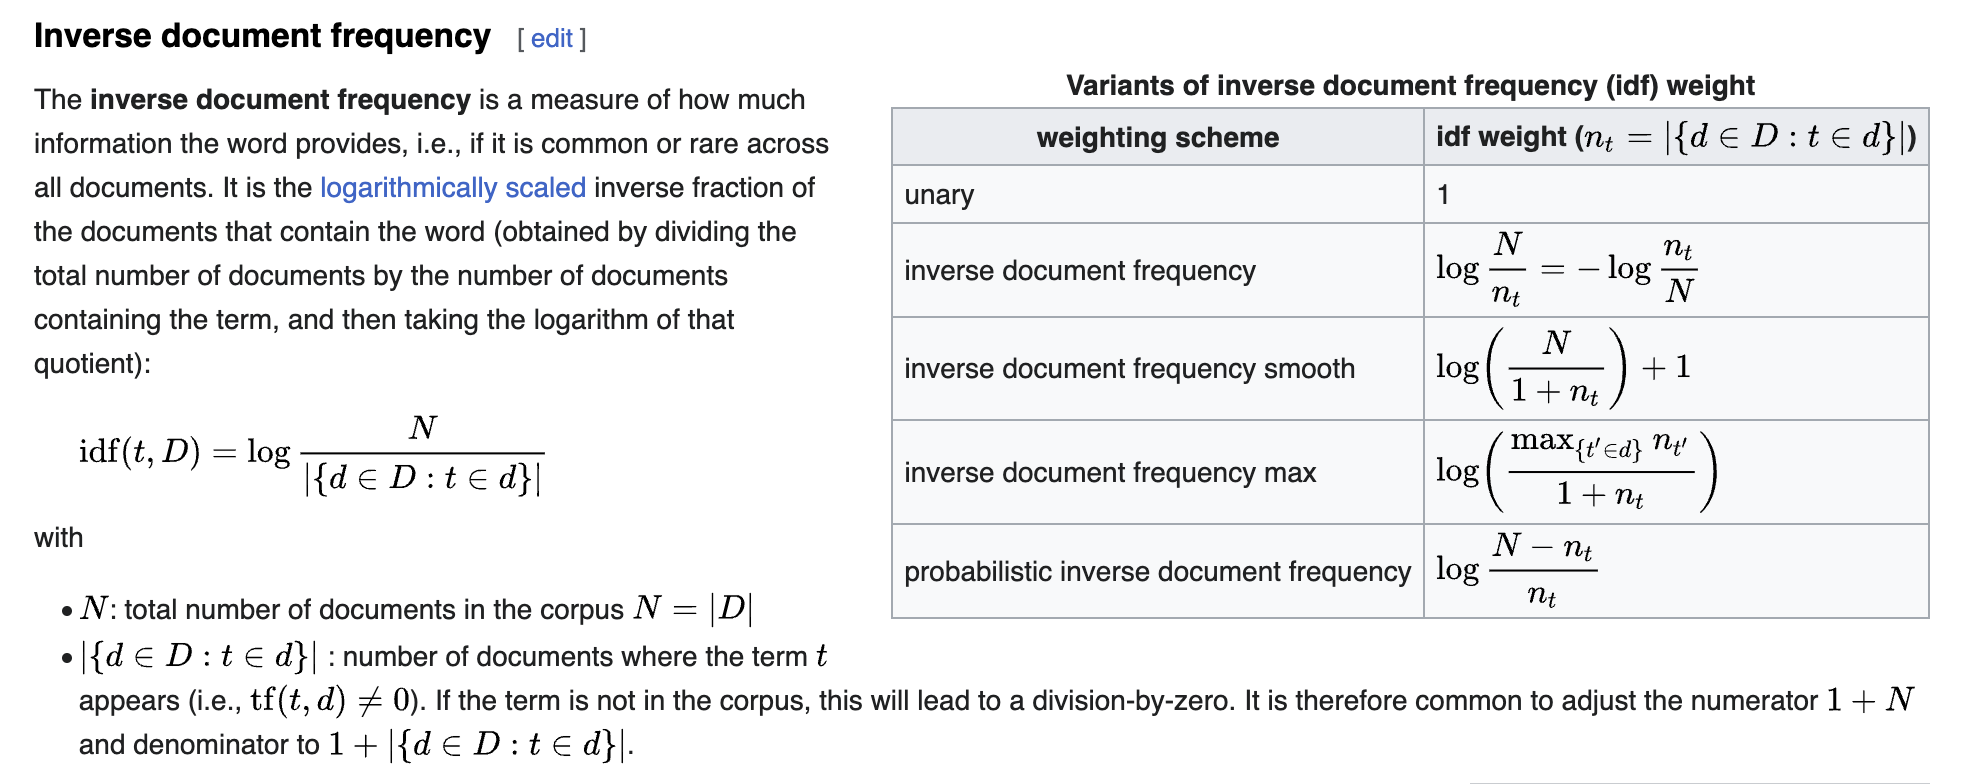

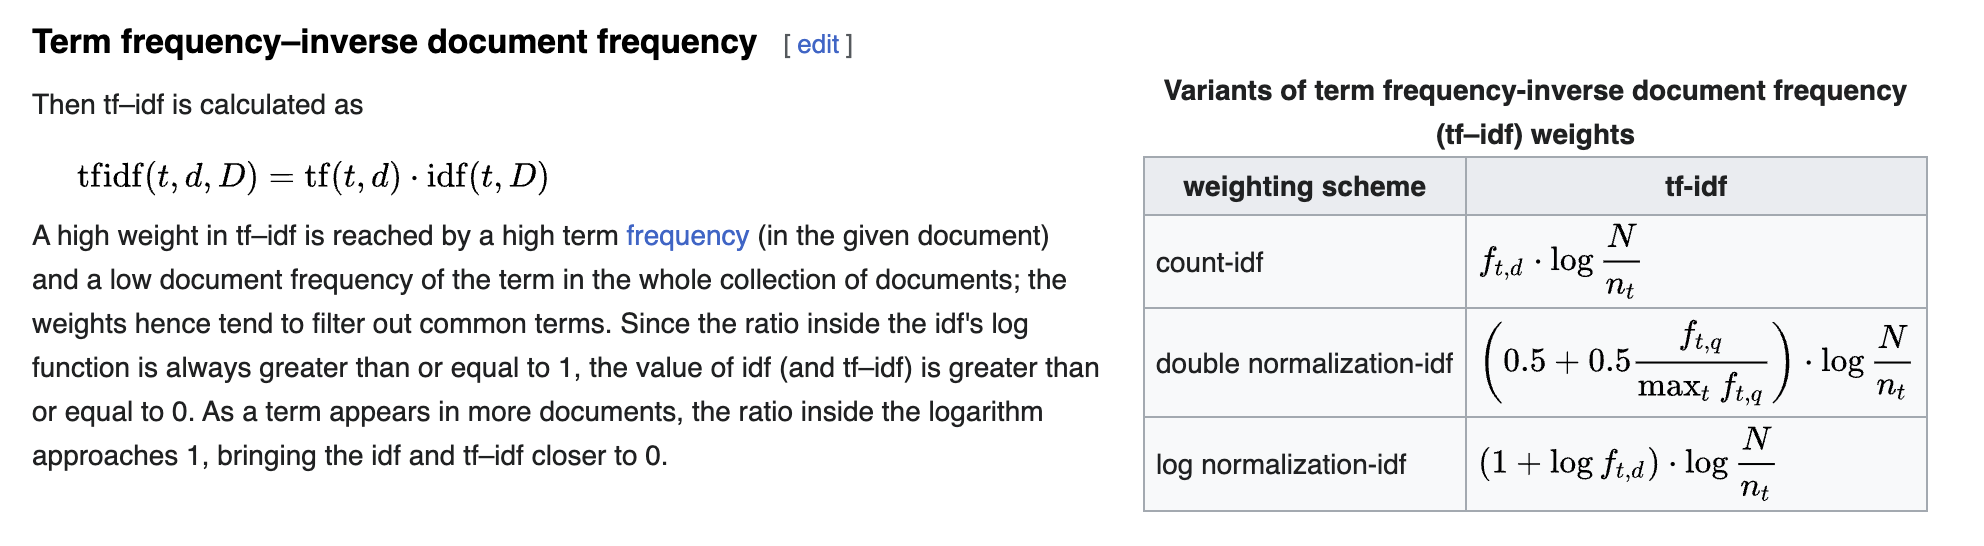

## How to go about it...

### Use case
- Analyze customer review data. Seperate by sentiment or star-rating and identify the most significant terms for each rating. 
- Analyse news articles of different topics. Find most significant terms for each topic.

### Steps

1. Load customer reviews
2. Split by sentiment
3. Clean text (convert to lower-case, remove digits and special characters)
4. Compute "Term Frequency"
5. Compute "Ineverse Document Frequency"


### Packages
- [`re`](https://docs.python.org/3/library/re.html) is a package for advanced string processing with regular expressions
- [`numpy`](https://numpy.org/) is a package for vector arithmetic
- [`glob`](https://docs.python.org/3/library/glob.html) for file listing
- [`matplotlib`](https://matplotlib.org/) for visualization

# Load customer reviews

In [69]:
! ls -l /data/IFI8410/sess01/sentiment_labelled_sentences/*_labelled.txt

-rw-r--r--. 1 pmolnar pmolnar 58226 Jul  5  2016 /data/IFI8410/sess01/sentiment_labelled_sentences/amazon_cells_labelled.txt
-rw-r--r--. 1 pmolnar pmolnar 85285 Feb 14  2015 /data/IFI8410/sess01/sentiment_labelled_sentences/imdb_labelled.txt
-rw-r--r--. 1 pmolnar pmolnar 61320 Jul  5  2016 /data/IFI8410/sess01/sentiment_labelled_sentences/yelp_labelled.txt


In [68]:
import glob
glob.glob('/data/IFI8410/sess01/sentiment_labelled_sentences/*_labelled.txt')

['/data/IFI8410/sess01/sentiment_labelled_sentences/amazon_cells_labelled.txt',
 '/data/IFI8410/sess01/sentiment_labelled_sentences/imdb_labelled.txt',
 '/data/IFI8410/sess01/sentiment_labelled_sentences/yelp_labelled.txt']

In [26]:
! head /data/IFI8410/sess01/sentiment_labelled_sentences/yelp_labelled.txt

Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
A great touch.	1


In [2]:
# loading text data
data = open('/data/IFI8410/sess01/sentiment_labelled_sentences/yelp_labelled.txt').readlines()
text_pos = [ row.split('\t')[0] for row in data if int(row.split('\t')[1]) == 1 ]
text_neg = [ row.split('\t')[0] for row in data if int(row.split('\t')[1]) == 0 ]
print(f"Number of positive lines: {len(text_pos):,}")
print(f"Number of negative lines: {len(text_neg):,}")

Number of positive lines: 500
Number of negative lines: 500


In [47]:
text_pos[:10]

['Wow... Loved this place.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!',
 'Highly recommended.',
 'The food, amazing.',
 'Service is also cute.']

In [48]:
text_neg[:10]

['Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Waitress was a little slow in service.']

In [37]:
display(data[:5])

['Wow... Loved this place.\t1\n',
 'Crust is not good.\t0\n',
 'Not tasty and the texture was just nasty.\t0\n',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\n',
 'The selection on the menu was great and so were the prices.\t1\n']

In [42]:
data_tuple = data[0].split('\t')
data_text = data_tuple[0]
data_sentiment = int(data_tuple[1])
data_text, data_sentiment


('Wow... Loved this place.', 1)

## Create functions to load text data and filter by sentiment

In [11]:
from typing import List, Tuple
from glob import glob
import os

def load_customer_review_data(files:str) -> List[Tuple[str, int]]:
    file_list = glob(files)
    data = []
    for file in file_list:
        if os.path.isfile(file):
            for dat in open(file):
                tup = dat.split('\t')
                data.append((tup[0].strip(), int(tup[1])))
    return data
            

In [17]:
corpus = load_customer_review_data('/data/IFI8410/sess01/sentiment_labelled_sentences/*labelled.txt')
print(f"Number of records: {len(corpus):,}")

Number of records: 3,000


In [18]:
corpus[:10]

[('So there is no way for me to plug it in here in the US unless I go by a converter.',
  0),
 ('Good case, Excellent value.', 1),
 ('Great for the jawbone.', 1),
 ('Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
  0),
 ('The mic is great.', 1),
 ('I have to jiggle the plug to get it to line up right to get decent volume.',
  0),
 ('If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
  0),
 ('If you are Razr owner...you must have this!', 1),
 ('Needless to say, I wasted my money.', 0),
 ('What a waste of money and time!.', 0)]

In [3]:
! head /data/public/newsgroup20/sci.electronics.txt

Newsgroup: sci.electronics
document_id: 52434
From: et@teal.csn.org (Eric H. Taylor)
Subject: Re: HELP_WITH_TRACKING_DEVICE

In article <00969FBA.E640FF10@AESOP.RUTGERS.EDU> mcdonald@AESOP.RUTGERS.EDU writes:
>[...]
>There are a variety of water-proof housings I could use but the real meat
>of the problem is the electronics...hence this posting.  What kind of
>transmission would be reliable underwater, in murky or even night-time


In [8]:
# ! cat /data/public/newsgroup20/sci.electronics.txt | grep 'Newsgroup:'

# Split by sentiment

In [19]:
def split_by_sentiment(corpus: List[Tuple[str, int]], sentiment: int) -> List[str]:
    assert sentiment in [0, 1], f"Sentiment must be 0 or 1. You provided: {sentiment}"
    return [ t[0] for t in corpus if t[1] == sentiment ]
    

In [20]:
corpus_pos = split_by_sentiment(corpus, 1)
corpus_neg = split_by_sentiment(corpus, 0)
display(corpus_pos[:5])
display(corpus_neg[:5])

['Good case, Excellent value.',
 'Great for the jawbone.',
 'The mic is great.',
 'If you are Razr owner...you must have this!',
 'And the sound quality is great.']

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'Needless to say, I wasted my money.']

# Clean text (convert to lower-case, remove digits and special characters)

In [21]:
import re

def convert_to_token_list(rawtxt: str) -> List[str]:
    txt1 = rawtxt.lower()
    txt1 = re.sub(r'\W', ' ', txt1)
    txt1 = re.sub(r'\d', ' ', txt1)
    txt1 = re.sub(r'\s+', ' ', txt1)
    return txt1.split()

In [22]:
for txt in corpus_pos[:10]:
    print(convert_to_token_list(txt))

['good', 'case', 'excellent', 'value']
['great', 'for', 'the', 'jawbone']
['the', 'mic', 'is', 'great']
['if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this']
['and', 'the', 'sound', 'quality', 'is', 'great']
['he', 'was', 'very', 'impressed', 'when', 'going', 'from', 'the', 'original', 'battery', 'to', 'the', 'extended', 'battery']
['very', 'good', 'quality', 'though']
['highly', 'recommend', 'for', 'any', 'one', 'who', 'has', 'a', 'blue', 'tooth', 'phone']
['so', 'far', 'so', 'good']
['works', 'great']


In [23]:
docs_token_pos = [ convert_to_token_list(txt) for txt in corpus_pos ]
docs_token_neg = [ convert_to_token_list(txt) for txt in corpus_neg ]

# Compute "Term Frequency"

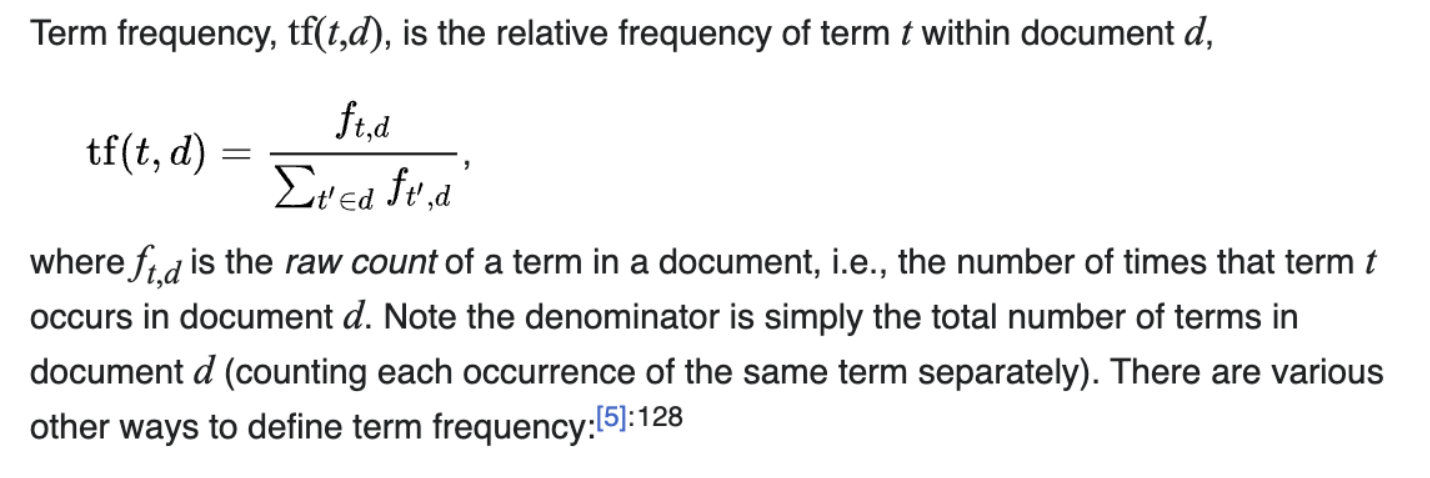

In [24]:
docs_token_pos[32]

['it',
 'feels',
 'more',
 'comfortable',
 'than',
 'most',
 'headsets',
 'because',
 'i',
 'wear',
 'glasses',
 'and',
 'that',
 'gets',
 'in',
 'the',
 'way',
 'sometimes']

In [25]:
doc = docs_token_pos[32]
sorted(doc)

['and',
 'because',
 'comfortable',
 'feels',
 'gets',
 'glasses',
 'headsets',
 'i',
 'in',
 'it',
 'more',
 'most',
 'sometimes',
 'than',
 'that',
 'the',
 'way',
 'wear']

In [44]:
from typing import List, Tuple, Dict

def term_count(doc: List[str]) -> Dict[str, float]:
    f_td = {}
    for tok in doc:
        f_td[tok] = f_td.get(tok, 0) + 1
    return f_td

def term_frequency(doc: List[str]) -> Dict[str, float]:
    f_td = term_count(doc)
    sum_f_td = sum(f_td.values())
    return { tok: (freq/sum_f_td) for tok, freq in f_td.items() } 

In [45]:
term_frequency(docs_token_pos[32])

{'it': 0.05555555555555555,
 'feels': 0.05555555555555555,
 'more': 0.05555555555555555,
 'comfortable': 0.05555555555555555,
 'than': 0.05555555555555555,
 'most': 0.05555555555555555,
 'headsets': 0.05555555555555555,
 'because': 0.05555555555555555,
 'i': 0.05555555555555555,
 'wear': 0.05555555555555555,
 'glasses': 0.05555555555555555,
 'and': 0.05555555555555555,
 'that': 0.05555555555555555,
 'gets': 0.05555555555555555,
 'in': 0.05555555555555555,
 'the': 0.05555555555555555,
 'way': 0.05555555555555555,
 'sometimes': 0.05555555555555555}

# Compute "Inverse Document Frequency"

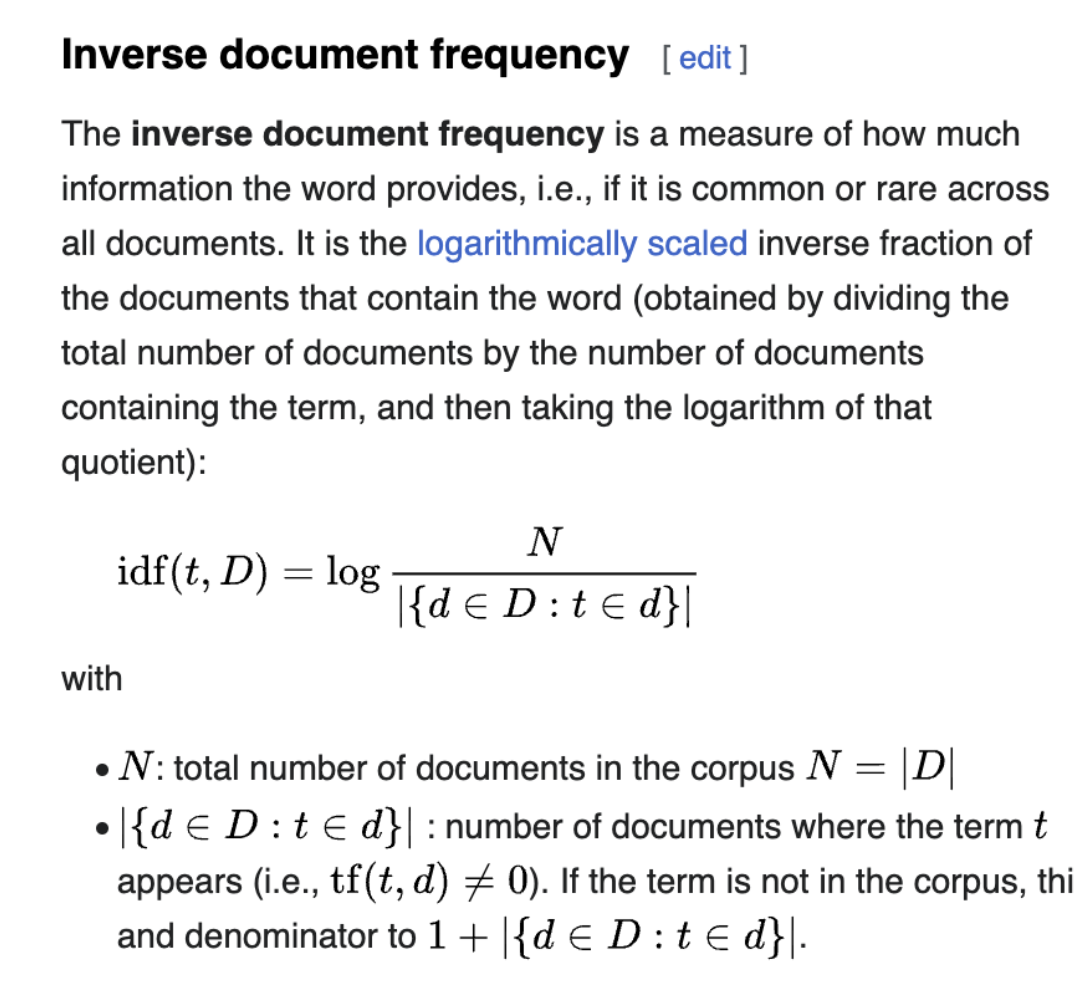

In [51]:
import math

def idf(corpus: List[List[str]]) -> Dict[str, float]:
    N = len(corpus)
    numdocs = {}
    for doc in corpus:
        tcnt = term_count(doc)
        for tok in tcnt.keys():
            numdocs[tok] = numdocs.get(tok, 0) + 1
    return { tok: math.log(N/(1+cnt)) for tok, cnt in numdocs.items() }
    

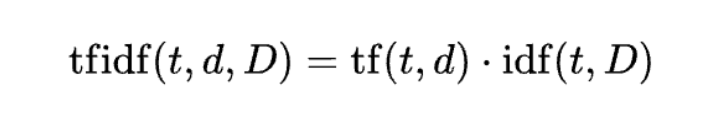

In [65]:
def tfidf_from_corpus(docs: List[List[str]]) -> List[Dict[str, float]]:
    idf_data = idf(docs)
    res = []
    for doc in docs:
        tf = term_frequency(doc)
        tfidf = { tok: freq * idf_data[tok] for tok, freq in tf.items() }
        tfidf_sorted = { x[0]: x[1] for x in sorted(tfidf.items(), key=lambda t: -t[1]) }
        res.append(tfidf_sorted)
    return res

In [66]:
tfidf_from_corpus(docs_token_pos)[:5]

[{'value': 1.341827559508747,
  'case': 1.0671744873417197,
  'excellent': 0.8453486885914939,
  'good': 0.5473141019217607},
 {'jawbone': 1.4817315064926027,
  'for': 0.5806969500778912,
  'great': 0.512632549546354,
  'the': 0.20036876436139342},
 {'mic': 1.5536520246055479,
  'great': 0.512632549546354,
  'is': 0.3526467634222338,
  'the': 0.20036876436139342},
 {'razr': 0.6585473362189345,
  'owner': 0.6337536082951334,
  'you': 0.6276853371907026,
  'must': 0.5193514508305602,
  'if': 0.402704548108485,
  'have': 0.3138426685953513,
  'are': 0.3031392120466366,
  'this': 0.17411302183890534},
 {'sound': 0.6520038342380243,
  'quality': 0.6082764568267758,
  'great': 0.3417550330309026,
  'is': 0.23509784228148917,
  'and': 0.1648102374514984,
  'the': 0.13357917624092894}]

In [67]:
tfidf_from_corpus(docs_token_neg)[:5]

[{'converter': 0.3152415812633503,
  'unless': 0.249227564067165,
  'plug': 0.23406310068056813,
  'us': 0.2192938183803853,
  'in': 0.19880702032162859,
  'way': 0.18957218461500464,
  'go': 0.17760483088734244,
  'by': 0.17630011783076557,
  'here': 0.17141182478028538,
  'me': 0.16593233288577172,
  'no': 0.1548941607878039,
  'there': 0.14265391778828526,
  'so': 0.13958065487697235,
  'for': 0.10453459879397839,
  'is': 0.07792698022961998,
  'to': 0.07569691833990098,
  'it': 0.06984674343012272,
  'a': 0.0697093146258782,
  'i': 0.0575441502226341,
  'the': 0.03887835223354471},
 {'tied': 0.6018248369573052,
  'lasting': 0.5649643725838356,
  'major': 0.5649643725838356,
  'conversations': 0.538811456906401,
  'problems': 0.45551229946329597,
  'charger': 0.4389376124820274,
  'minutes': 0.3619105342650089,
  'more': 0.3442599874976491,
  'than': 0.3442599874976491,
  'for': 0.19956605224304969,
  'to': 0.1445122986489019},
 {'get': 0.44902503830868484,
  'jiggle': 0.38941607097